In [ ]:
import numpy as np
import os
from grid import Grid
from fields import Fields
from operators import Operators
from time_integrators import TimeIntegrator

# Parameters to sweep
reynolds_numbers = [100, 1000]
grid_sizes = [32]
Lx, Ly = 1.0, 1.0
dt = 0.005
num_steps = 5000

# Create output directory
output_dir = "nse_results"
os.makedirs(output_dir, exist_ok=True)

# Loop over all combinations of Re and grid size
for Re in reynolds_numbers:
    for N in grid_sizes:
        print(f"Running simulation for Re = {Re}, Grid = {N}x{N}")

        # Initialize components
        grid = Grid(N, N, Lx, Ly, Re, dt)
        fields = Fields(grid)
        ops = Operators(grid)
        integrator = TimeIntegrator(fields, ops)

        # Time integration loop
        for step in range(num_steps):
            max_div = integrator.advance_one_step()
            if step % 100 == 0:
                print(f"  Step {step}, Max Divergence: {max_div:.2e}")

        # Crop ghost cells for output
        u = fields.u[1:-1, 1:-1]
        v = fields.v[1:-1, 1:-1]
        p = fields.p[1:-1, 1:-1]

        # Save results
        filename = f"Re{int(Re)}_N{N}.npz"
        filepath = os.path.join(output_dir, filename)
        np.savez_compressed(filepath, u=u, v=v, p=p, Re=Re, N=N, dt=dt)
        print(f"Saved results to {filepath}")


Running simulation for Re = 100, Grid = 128x128
Iteration 0: u_max_residual = 0.0, v_max_residual = 0.0
Converged at iteration 0
Iteration 0: u_max_residual = 0.0
Converged at iteration 0
35.28499641062455 after PPE
  Step 0, Max Divergence: 5.12e+02
Iteration 0: u_max_residual = 5.684341886080802e-14, v_max_residual = 5.293955920339377e-23
Converged at iteration 0
Iteration 0: u_max_residual = 0.0
Converged at iteration 0
57.11203694233598 after PPE
Iteration 0: u_max_residual = 5.684341886080802e-14, v_max_residual = 4.440892098500626e-16
Converged at iteration 0
Iteration 0: u_max_residual = 0.0
Converged at iteration 0
66.71456397319069 after PPE
Iteration 0: u_max_residual = 1.7763568394002505e-15, v_max_residual = 5.551115123125783e-17
Converged at iteration 0
Iteration 0: u_max_residual = 0.0
Converged at iteration 0
52.31891931810332 after PPE
Iteration 0: u_max_residual = 1.4210854715202004e-14, v_max_residual = 2.220446049250313e-16
Converged at iteration 0
Iteration 0: u_max

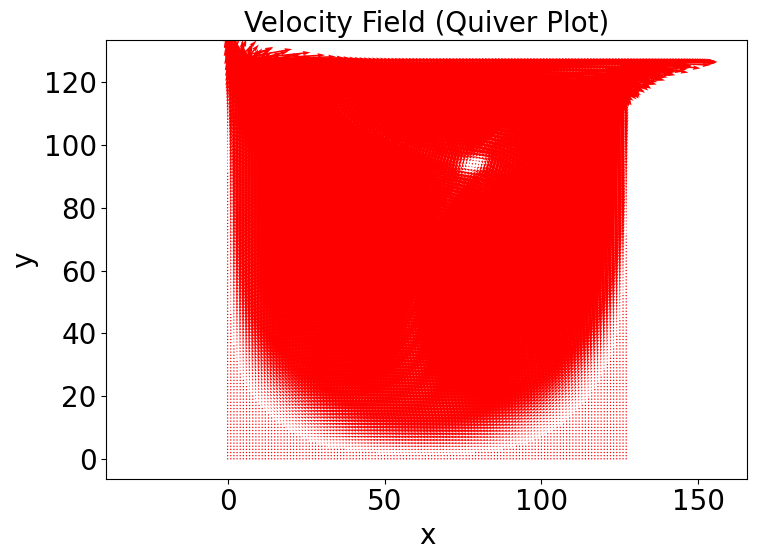

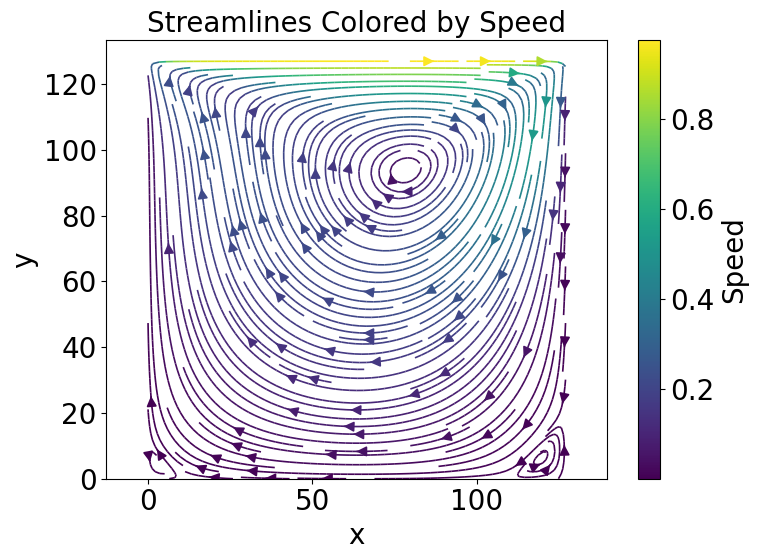

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Load simulation data
data = np.load("nse_results/Re100_N128.npz")
u = data["u"]
v = data["v"]
p = data["p"]

# Grid size (no ghost cells)
nx, ny = u.shape
x = np.arange(0, nx)
y = np.arange(0, ny)

# --- Quiver Plot ---
X_q, Y_q = np.meshgrid(x, y, indexing='ij')
plt.figure(figsize=(8, 6))
plt.quiver(X_q, Y_q, u, v, color='red', scale=5)
plt.title("Velocity Field (Quiver Plot)")
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.tight_layout()
plt.show()

# --- Streamline Plot with Speed Coloring ---
X_s, Y_s = np.meshgrid(x, y, indexing='xy')

# Transpose velocity fields for streamplot (shape: [ny, nx])
u_plot = u.T
v_plot = v.T

# Compute speed (magnitude of velocity)
speed = np.sqrt(u_plot**2 + v_plot**2)

plt.figure(figsize=(8, 6))
stream = plt.streamplot(X_s, Y_s, u_plot, v_plot, color=speed, cmap='viridis', density=2.0, linewidth=1.2, arrowsize=1.5)
plt.colorbar(stream.lines, label="Speed")
plt.title("Streamlines Colored by Speed")
plt.xlabel("x")
plt.ylabel("y")
plt.axis("equal")
plt.tight_layout()
plt.show()
